In [71]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x, y = make_regression(n_features=1, noise=30, random_state=0)

In [72]:
x.shape, y.shape

((100, 1), (100,))

In [73]:
df = pd.DataFrame(x)
df.columns = ["x"]
df["y"] = y
df

,x,y
0,-0.359553,-29.387972
1,0.976639,-18.771359
2,0.402342,0.563777
3,-0.813146,19.905024
4,-0.887786,-31.843421
...,...,...
95,-1.165150,-46.555436
96,-0.362741,29.346690
97,0.356366,5.143858
98,-1.613898,-21.482798


<Axes: ylabel='Frequency'>

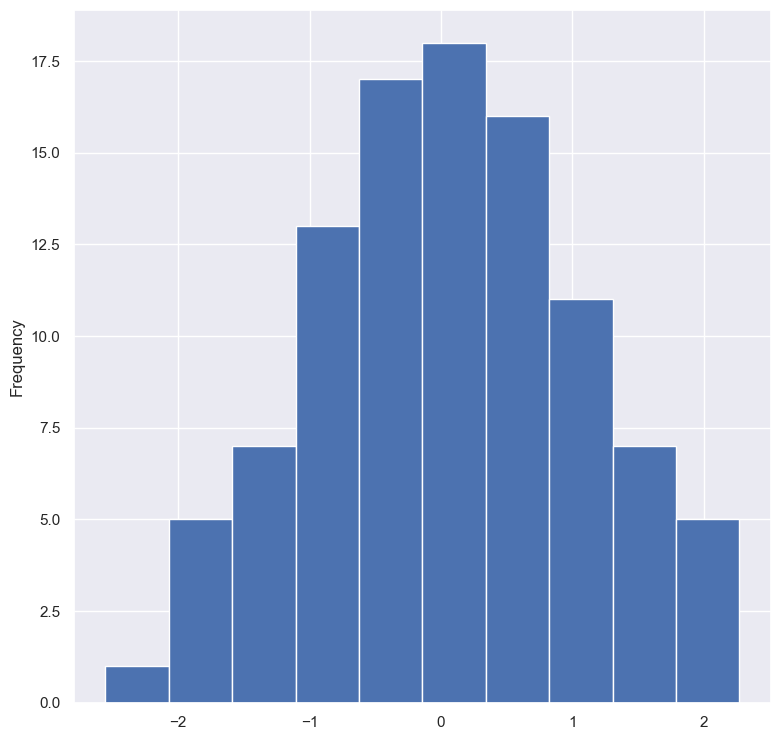

In [74]:
df["x"].plot(kind="hist")

In [75]:
y_mean = np.array([y.mean()] * 100)

In [76]:
from sklearn.linear_model import LinearRegression

# LinearRegression() simplemente indica una clase, pero estos modelos pueden entrenarse con otros datos
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

# Training the linear regression model
model_1.fit(x, y)

LinearRegression()

In [77]:
y_pred = model_1.predict(x)

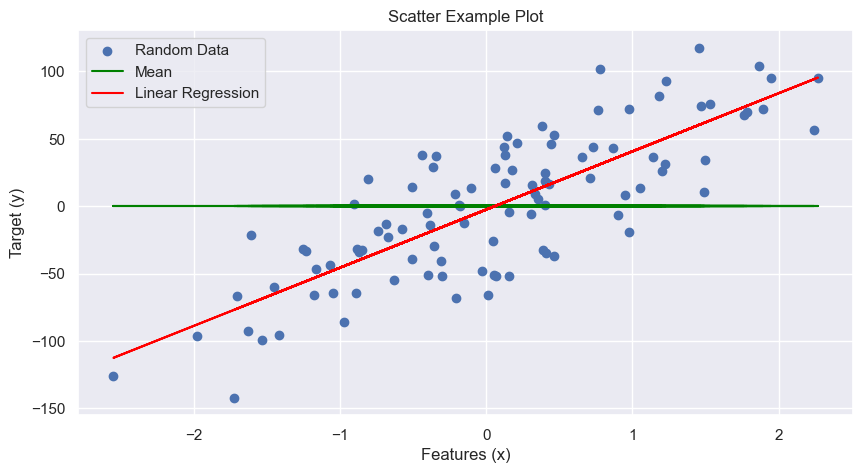

In [78]:
# Selector
plt.figure(figsize=(10,5)) # Defines the canvas on which to work

# Data
plt.scatter(x, y, label="Random Data") # Establishes the graph to be plotted in the canvas

# Simple model mean
plt.plot(x, y_mean, label="Mean", c="green") 

# Linear Regression
plt.plot(x, y_pred, label="Linear Regression", c="red") 

# Show
plt.xlabel("Features (x)")
plt.ylabel("Target (y)")
plt.title("Scatter Example Plot")
plt.legend() # Shows the legend declared in plt.scatter

plt.savefig("../reports/figures/random1.png")

# Activity

Dataset: Boston Housing

X: Top-1 correlate feature with target

Target: MEDV

Model: Linear Regresion

In [79]:
df = pd.read_csv("../data/raw/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

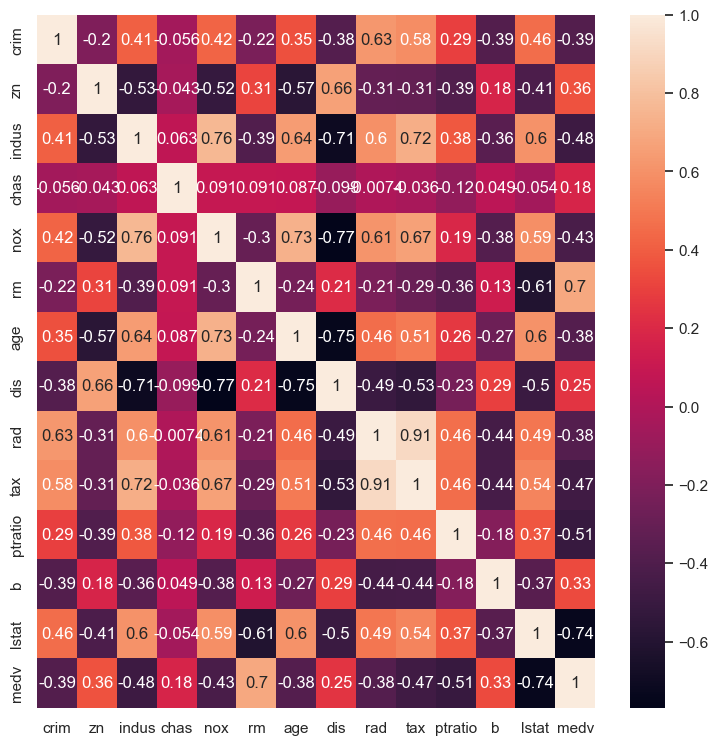

In [80]:
df.corr()
sns.set(rc={"figure.figsize":(9, 9)}) #width=3, #height=4
sns.heatmap(df.corr(), annot=True)

The feature with the highest negative correlation with the target (MEDV) is lstat (-0.74) and the highest positive correlation is rm (0.7).

In [81]:
# Declaring the models
model_lstat = LinearRegression()
model_rm = LinearRegression()

In [82]:
# Training the models
medv_lstat = model_lstat.fit(np.array(df["lstat"]).reshape(-1,1), df["medv"])
model_rm = model_rm.fit(np.array(df["rm"]).reshape(-1,1), df["medv"])

In [83]:
# Predicting the x values
pred_lstat = model_lstat.predict(np.array(df["lstat"]).reshape(-1,1))
pred_rm = model_rm.predict(np.array(df["rm"]).reshape(-1,1))

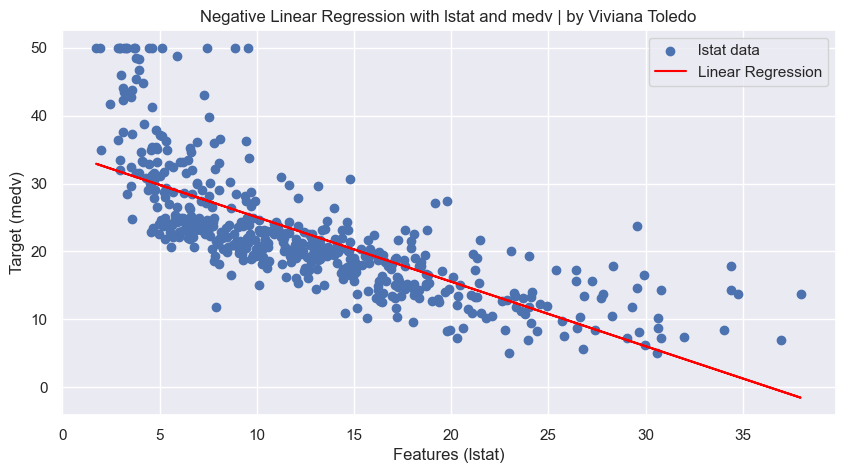

In [90]:
# Canvas
plt.figure(figsize=(10,5)) 
# Data
plt.scatter(np.array(df["lstat"]), df["medv"], label="lstat data")

# Linear Regression
plt.plot(np.array(df["lstat"]), pred_lstat, label="Linear Regression", c="red") 

# Show
plt.xlabel("Features (lstat)")
plt.ylabel("Target (medv)")
plt.title("Negative Linear Regression with lstat and medv | by Viviana Toledo")
plt.legend() # Shows the legend declared in plt.scatter
plt.savefig("../reports/figures/lstat_medv.png")

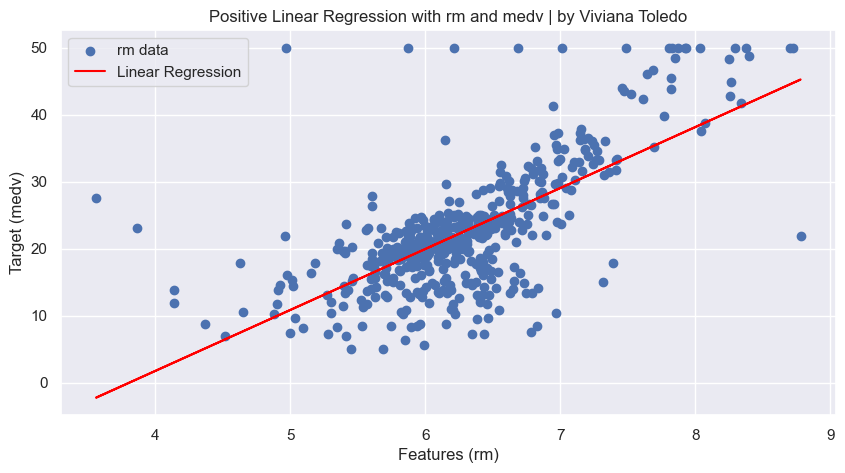

In [89]:
# Canvas
plt.figure(figsize=(10,5)) 
# Data
plt.scatter(np.array(df["rm"]), df["medv"], label="rm data")

# Linear Regression
plt.plot(np.array(df["rm"]), pred_rm, label="Linear Regression", c="red") 

# Show
plt.xlabel("Features (rm)")
plt.ylabel("Target (medv)")
plt.title("Positive Linear Regression with rm and medv | by Viviana Toledo")
plt.legend() # Shows the legend declared in plt.scatter
plt.savefig("../reports/figures/rm_medv.png")